--- Task 1: Exploratory Data Analysis (EDA) ---
First 5 rows of the dataset:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>

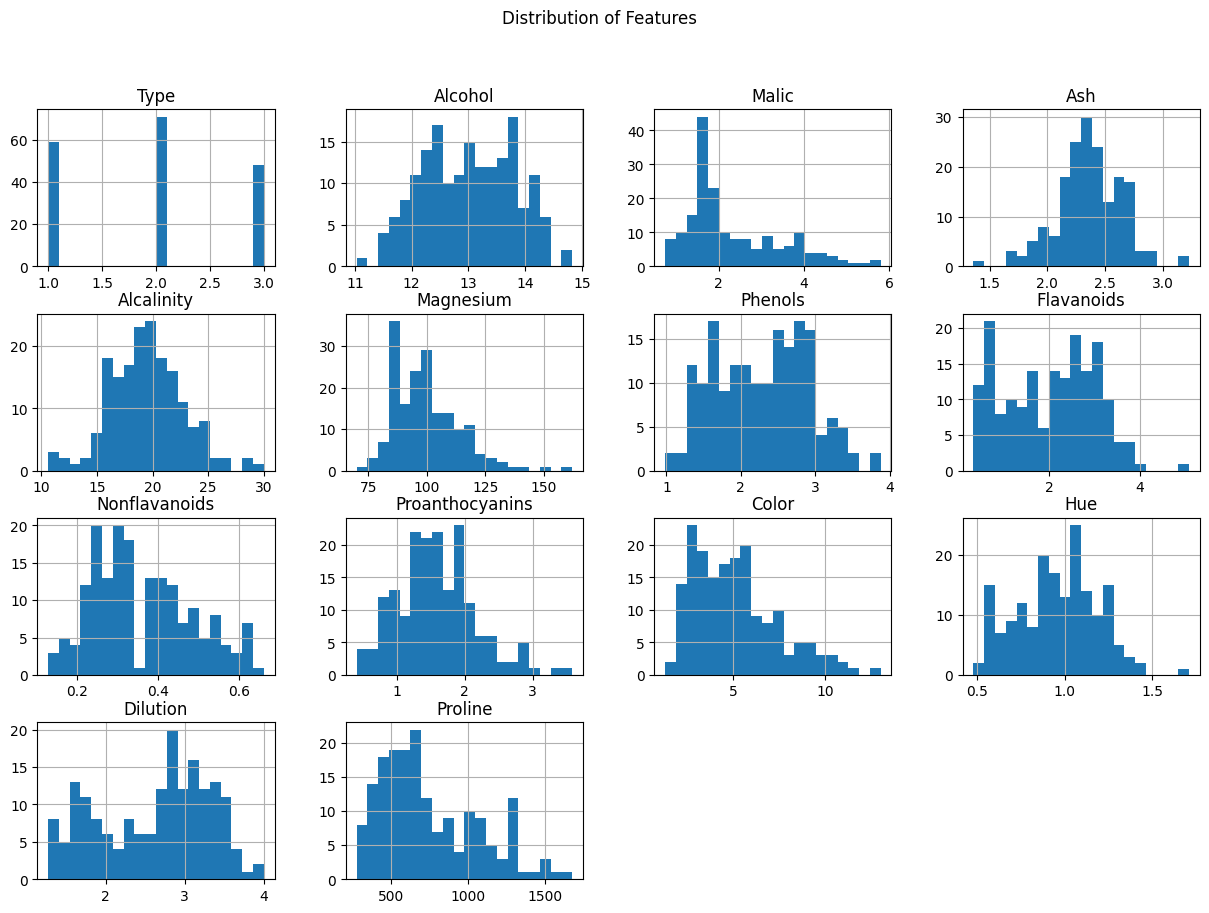


Generating Correlation Matrix...


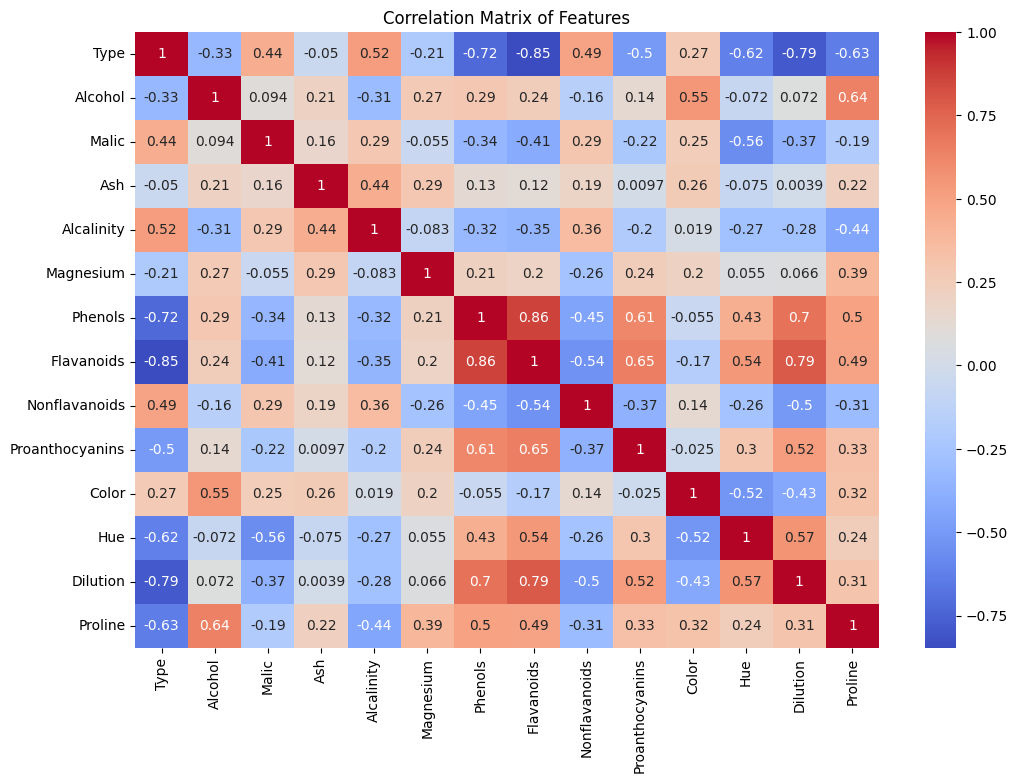


--- Task 2: Dimensionality Reduction with PCA ---

Generating Scree Plot...


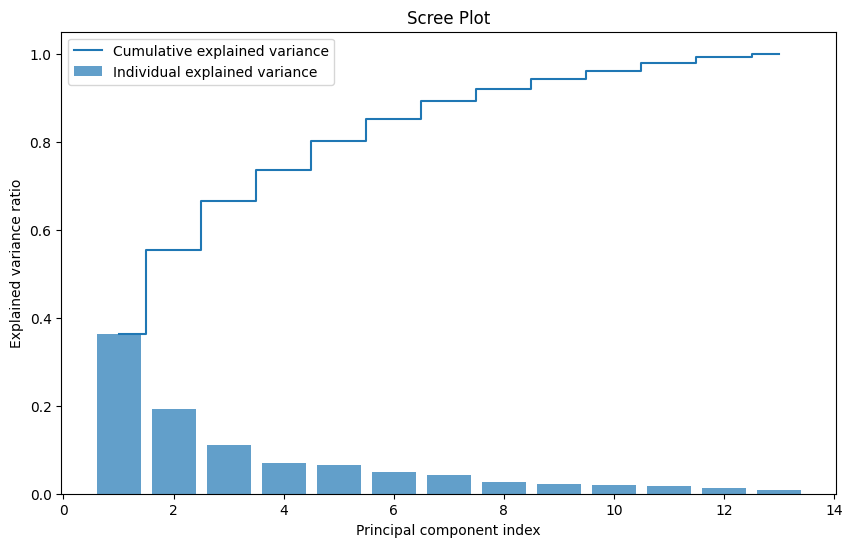


Number of components to explain 95% variance: 10

---Clustering with Original Data ---

Generating plot for clustering on original data...


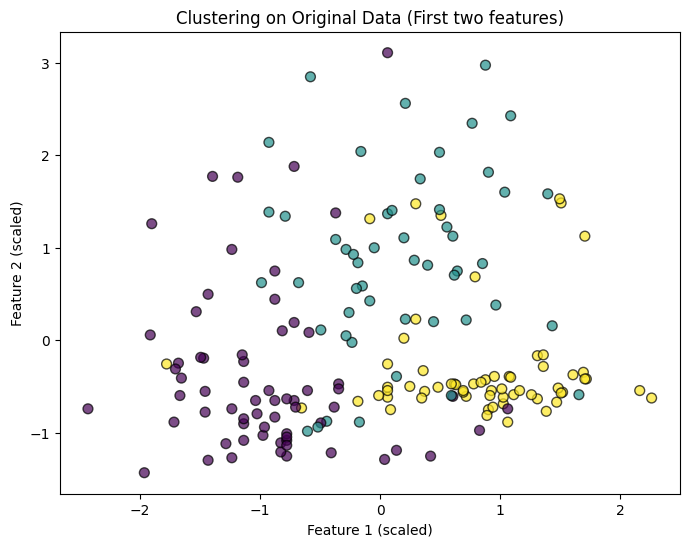

Silhouette Score (Original Data): 0.2849
Davies-Bouldin Index (Original Data): 1.3892

--- Task 4: Clustering with PCA Data ---

Generating plot for clustering on PCA-transformed data...


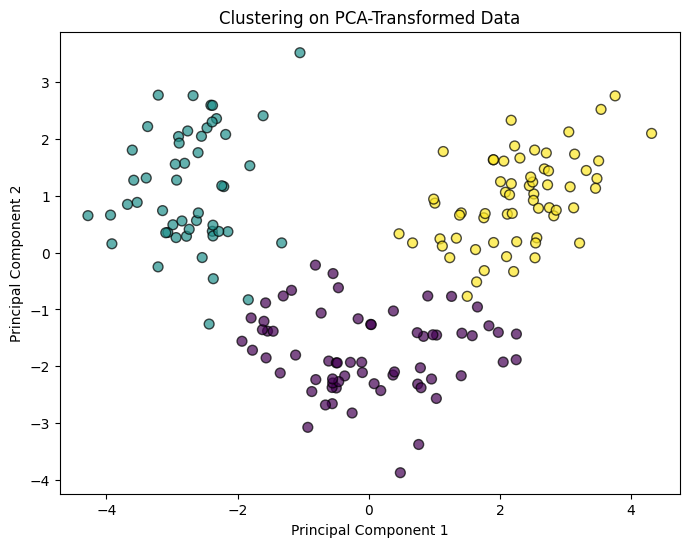

Silhouette Score (PCA Data): 0.2987
Davies-Bouldin Index (PCA Data): 1.3363

--- Comparison and Analysis ---

Comparison of Clustering Performance:
Metric                    Original Data   PCA Data       
-------------------------------------------------------
Silhouette Score          0.2849          0.2987         
Davies-Bouldin Index      1.3892          1.3363         


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

df = pd.read_csv('wine.csv')

# Exploratory Data Analysis (EDA)
print("--- Task 1: Exploratory Data Analysis (EDA) ---")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())


print("\nGenerating Feature Distribution Plot...")
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Features')
plt.show()

# Correlation matrix
print("\nGenerating Correlation Matrix...")
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

#  Dimensionality Reduction with PCA
print("\n--- Task 2: Dimensionality Reduction with PCA ---")
X = df.drop('Type', axis=1)
y = df['Type']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of principal components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree plot
print("\nGenerating Scree Plot...")
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Scree Plot')
plt.show()

# We can see that the first few components explain most of the varianc
# A common approach is to select the number of components that explain a certain amount of variance for example, 95%.
n_components = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"\nNumber of components to explain 95% variance: {n_components}")

# Transform the original dataset into the principal components
pca = PCA(n_components=n_components)
X_pca_transformed = pca.fit_transform(X_scaled)

# Clustering with Original Data
print("\n---Clustering with Original Data ---")
kmeans_original = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters_original = kmeans_original.fit_predict(X_scaled)

# Visualize clustering results
print("\nGenerating plot for clustering on original data...")
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_original, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
plt.title('Clustering on Original Data (First two features)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

# Evaluate clustering performance
silhouette_original = silhouette_score(X_scaled, clusters_original)
davies_bouldin_original = davies_bouldin_score(X_scaled, clusters_original)
print(f"Silhouette Score (Original Data): {silhouette_original:.4f}")
print(f"Davies-Bouldin Index (Original Data): {davies_bouldin_original:.4f}")

# Clustering with PCA Data
print("\n--- Task 4: Clustering with PCA Data ---")
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters_pca = kmeans_pca.fit_predict(X_pca_transformed)

# Visualize clustering results
print("\nGenerating plot for clustering on PCA-transformed data...")
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_transformed[:, 0], X_pca_transformed[:, 1], c=clusters_pca, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
plt.title('Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Evaluate clustering performance
silhouette_pca = silhouette_score(X_pca_transformed, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(X_pca_transformed, clusters_pca)
print(f"Silhouette Score (PCA Data): {silhouette_pca:.4f}")
print(f"Davies-Bouldin Index (PCA Data): {davies_bouldin_pca:.4f}")

# Comparison and Analysis
print("\n--- Comparison and Analysis ---")
print("\nComparison of Clustering Performance:")
print(f"{'Metric':<25} {'Original Data':<15} {'PCA Data':<15}")
print("-" * 55)
print(f"{'Silhouette Score':<25} {silhouette_original:<15.4f} {silhouette_pca:<15.4f}")
print(f"{'Davies-Bouldin Index':<25} {davies_bouldin_original:<15.4f} {davies_bouldin_pca:<15.4f}")